In [162]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio

In an alternative universe, Jaina is a mage learning how to make objects fly. She wants to test how long she can fly a collection of magical carpets.


She has n training carpets – with masses given by $x_1, x_2, \ldots x_n$ – and flies these carpets once to collect training data. The experimental flight time of carpet $i$ is given by $y_i$. She believes that the flight time is well approximated by a polynomial function of the mass

$$ y_i ≈ w_0 + w_1 x_i + w_2 x_i^2 \cdots + w_D x_i^D$$

where her goal is to fit a polynomial of degree D to this data. Include all text responses and plots
in your submission.

## Part (a): Formulate LS problem

Show how Jaina’s problem can be formulated as a linear regression problem. For this part, you can either type the math in latex onto the python notebook, or attach the handwritten solution to the submitted pdf.

## Part (b): Implement LS problem for fixed D

You are given data of the masses $\{x_i\}_{i=1}^n$ and flying times $\{y_i\}_{i=1}^n$ in the “x_train” and “y_train” keys of the file 1D poly.mat with the masses centered and normalized to lie in the range [−1,1]. 


Write a script to do a least-squares fit (taking care to include a constant term) of a polynomial function of degree fixed $D=5$ to the data. Letting $\hat{f}$ denote the fitted polynomial, report the average training error 
$ R(D) = \frac{1}{n} \sum_{i=1}^n (y_i − \hat{f}(x_i))^2.$ You may not use any library other than numpy and numpy.linalg for computation.

In [163]:
data = spio.loadmat('1D_poly.mat', squeeze_me=True) 
x_train = np.array(data['x_train'])
y_train = np.array(data['y_train']).T
D = 5

# TODO: Your solution for part (b) here
x_arr = []
for x in x_train:
    temp = []
    for i in range(D+1):
        temp.append(x**i)
    x_arr.append(temp)
x_arr = np.array(x_arr)

w = np.linalg.lstsq(x_arr,y_train,rcond=None)[0]
print("w:\n",w)

# find average training error
error = np.sum((y_train - np.dot(x_arr,w))**2) / len(y_train)

print("\nError:",error)

print("\ny_train:\n",y_train)
print("\npredicted:\n",np.dot(x_arr,w))

w:
 [ 9.58634937  6.09015945  3.87983398  7.35821231 13.50335457  2.27020208]

Error: 0.44379265231920206

y_train:
 [11.43517643  9.15939136  7.79121686  7.64604858  7.2842167   7.64649196
  8.2666563   7.86691196  8.30315368  9.72401144  9.50953025 10.25750217
 11.22305493 14.01833207 16.10368296 15.80407223 21.97631689 25.46609601
 34.03048174 42.56554904]

predicted:
 [11.25096407  9.32502787  8.12520354  7.49777811  7.302422    7.41570974
  7.73464066  8.18015955  8.7006774   9.27559204  9.91880886 10.68226147
 11.65943244 12.98887395 14.85772847 17.5052495  21.22632219 26.37498409
 33.36794583 42.68811177]


## Part (c): Study the effect of D

You are given data of the masses ${x_i}_{i=1}^n$ and flying times ${x_i}_{i=1}^n$ in the “x_train” and “y_train” keys of the file 1D poly.mat with the masses centered and normalized to lie in the range [−1,1]. 


Write a script to do a least-squares fit (taking care to include a constant term) of a polynomial function of degree $D$ to the data. Letting $f_D$ denote the fitted polynomial, report the average training error 
$ R(D) = \frac{1}{n} \sum_{i=1}^n (y_i − f_D(x_i))^2$ against D in the range $D \in \{1,2,3,...,n − 1\}$. You may not use any library other than numpy and numpy.linalg for computation.

In [164]:
n = 20
err_train = np.zeros(n - 1)

# TODO: Your solution for part (c) here
data = spio.loadmat('1D_poly.mat', squeeze_me=True) 
x_train = np.array(data['x_train'])
y_train = np.array(data['y_train']).T

w_arr = []
for j in range(1,n):
    D = j-1
    # print(j)
    x_arr = []
    for x in x_train:
        temp = []
        for i in range(D+1):
            temp.append(x**i)
        x_arr.append(temp)
    x_arr = np.array(x_arr)

    w_arr.append(np.linalg.lstsq(x_arr,y_train,rcond=None)[0])

    # find average training error
    err_train[j-1] = np.sum((y_train - np.dot(x_arr,w_arr[D]))**2) / len(y_train)


#----------------------
print("\nError:",err_train)


Error: [8.87821855e+01 3.45721666e+01 4.99775029e+00 1.93329132e+00
 4.54755075e-01 4.43792652e-01 4.25175816e-01 4.13277674e-01
 3.77384634e-01 3.59758018e-01 3.57971335e-01 3.51709106e-01
 3.51055058e-01 3.12296085e-01 1.01849068e-01 5.00423473e-02
 3.24154618e-02 8.97826374e-03 8.57340109e-03]


## Part (d): Interpreting the plot

How does the average training error behave as a function of D, and why? What happens
if you try to fit a polynomial of degree n with a standard matrix inversion method? Include your answer in text here in the python notebook.

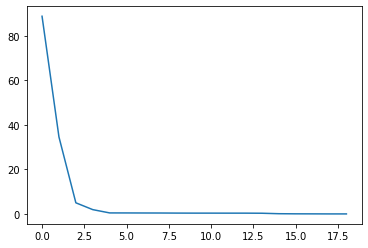

In [165]:
D = n-1
plt.plot(np.arange(0,D), err_train)
plt.show()

As D increases, the average training error decreases 

## Part (e): Test Error

Jaina has taken Mystical Learning 445, and so decides that she needs to run another experiment before deciding that her prediction is true. 


She runs another fresh experiment of flight times using the same carpets, to obtain the data with key “y_fresh” in 1D_POLY.MAT.

Denoting the fresh flight time of peach i by $\tilde{y}_i$, plot the average error $$R(D) = \frac{1}{n} \sum_{i=1}^n (\tilde{y}_i − f_D(x_i))^2$$

for the same values of D as in part (c) using the polynomial approximations $f_D$ also from the previous part.


Error: [84.44093003 35.76558697  6.36862586  4.24748382  1.64204005  1.69443584
  1.70328865  1.69571952  1.74378079  1.74604462  1.70856745  1.73724792
  1.76625405  1.80539759  2.03063753  1.90848547  2.04259668  2.0008582
  1.9912998 ]


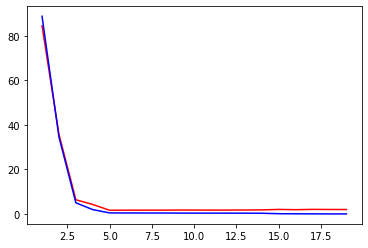

In [166]:
data = spio.loadmat('1D_poly.mat', squeeze_me=True) 
x_train = np.array(data['x_train'])
y_train = np.array(data['y_train']).T
y_fresh = np.array(data['y_fresh']).T
n = 20 #max degree
err_fresh = np.zeros(n - 1)

#TODO: Your solution for part (e) here
for j in range(1,n):
    D = j-1
    # print(j)
    x_arr = []
    for x in x_train:
        temp = []
        for i in range(D+1):
            temp.append(x**i)
        x_arr.append(temp)
    x_arr = np.array(x_arr)

    # w = np.linalg.lstsq(x_arr,y_fresh,rcond=None)[0]

    # find average training error
    err_fresh[j-1] = np.sum((y_fresh - np.dot(x_arr,w_arr[D]))**2) / len(y_fresh)


#----------------------
print("\nError:",err_fresh)

plt.plot(np.arange(1,n),err_fresh,color='red')
plt.plot(np.arange(1,n),err_train,color='blue')

plt.show()


## Part (f): Comparison between the two plots

How does the plot above differ from the plot in (c) and why? How do you propose using the two plots from parts (c) and (e) to “select” the right polynomial model for Jaina? Include your answer in text here in the python notebook.

Hint: Find the *elbow point* in the plot above.